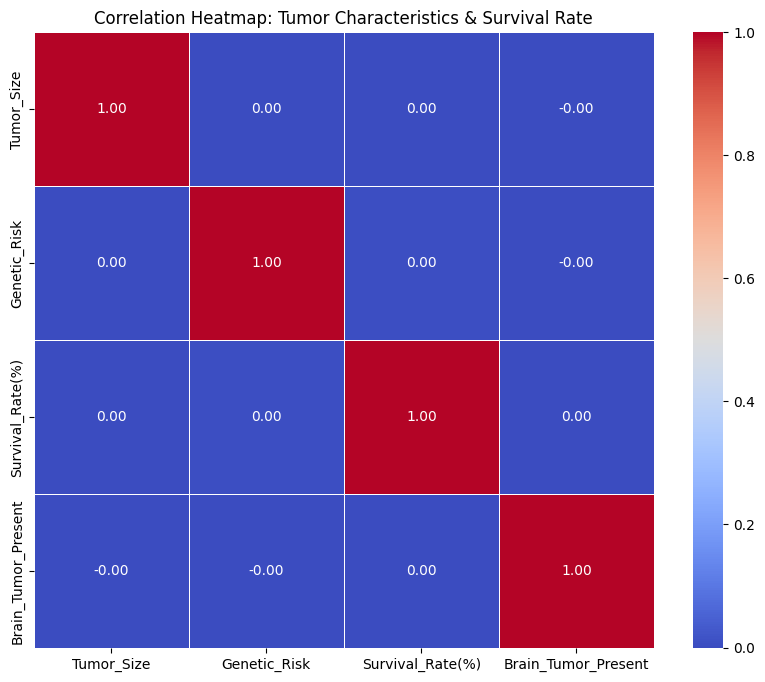

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("Brain_Tumor_Prediction_Dataset.csv")

# Convert categorical variables to numerical where necessary
df["Brain_Tumor_Present"] = df["Brain_Tumor_Present"].map({"Yes": 1, "No": 0})

# --- 1. Heatmap: Correlation between tumor characteristics and survival rates ---
plt.figure(figsize=(10, 8))
corr_matrix = df[["Tumor_Size", "Genetic_Risk", "Survival_Rate(%)", "Brain_Tumor_Present"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Tumor Characteristics & Survival Rate")
plt.show()


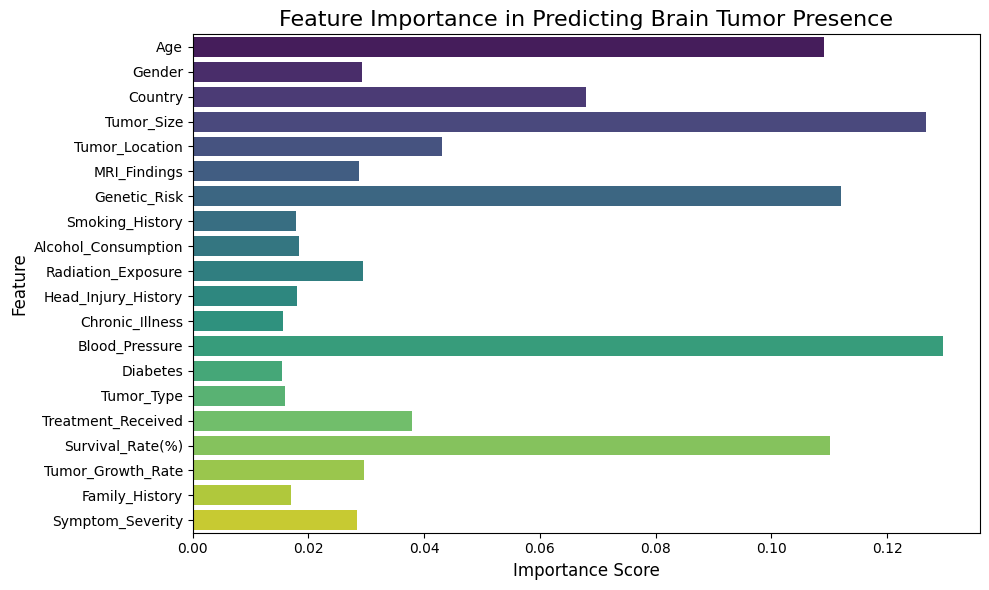

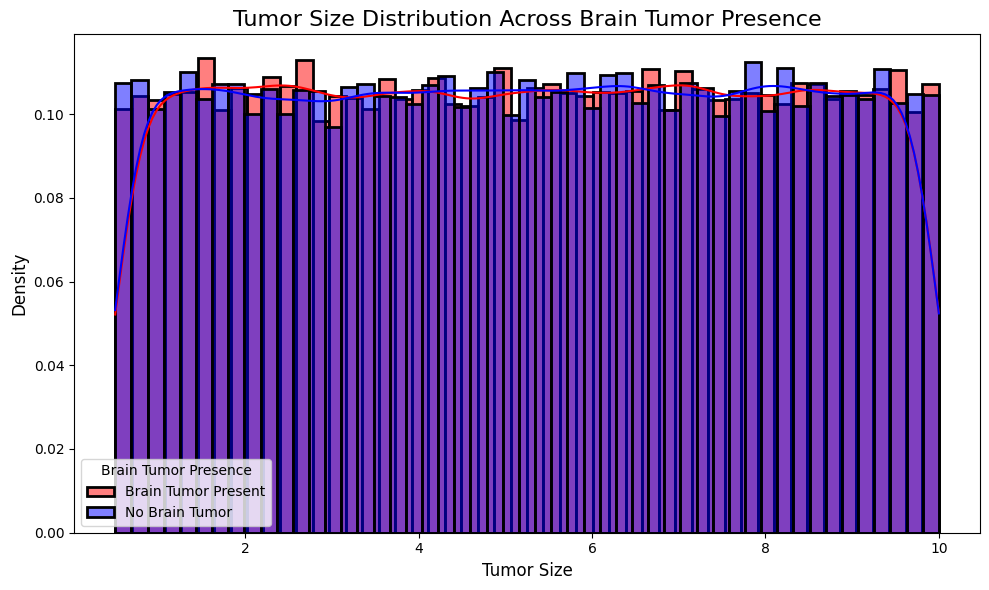

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


#Load dataset
df = pd.read_csv("Brain_Tumor_Prediction_Dataset.csv")

df["Brain_Tumor_Present"] = df["Brain_Tumor_Present"].map({"Yes": 1, "No": 0})

df_encoded = df.copy()

# Encode categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop(columns=["Brain_Tumor_Present"])
y = df_encoded["Brain_Tumor_Present"]

# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance in Predicting Brain Tumor Presence", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

# Plot tumor size distributions for both classes (Tumor Present and Tumor Absent)
sns.histplot(df[df["Brain_Tumor_Present"] == 1]["Tumor_Size"], kde=True, color="red", label="Brain Tumor Present", stat="density", linewidth=2)
sns.histplot(df[df["Brain_Tumor_Present"] == 0]["Tumor_Size"], kde=True, color="blue", label="No Brain Tumor", stat="density", linewidth=2)

# Add titles and labels
plt.title("Tumor Size Distribution Across Brain Tumor Presence", fontsize=16)
plt.xlabel("Tumor Size", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Brain Tumor Presence")
plt.tight_layout()
plt.show()

